# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [20]:
# Load pickled data
import pickle
import numpy as np
from sys import getsizeof

training_file = 'train.p'
testing_file  = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_test.shape[1:3]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Sample traffic sign images


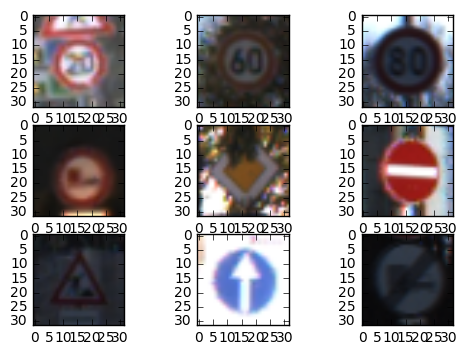

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Show examples of the traffic sign dataset
print('Sample traffic sign images')
sign_idx = np.linspace(0,n_train-1,9, dtype=np.int32)
for idx in range(1,10):
    plt.subplot(3,3,idx)
    plt.imshow(X_train[sign_idx[idx-1]])

[]

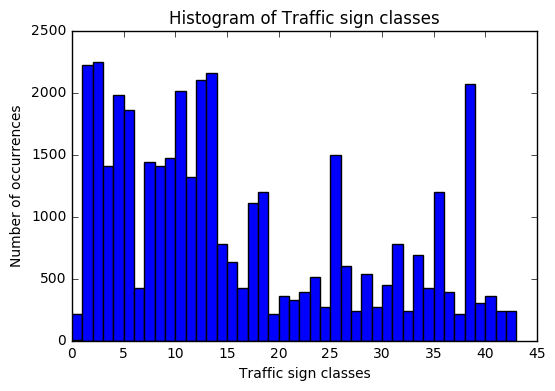

In [4]:
# Show a histogram with all classes
plt.hist(y_train, range(n_classes+1))
plt.title("Histogram of Traffic sign classes")
plt.xlabel('Traffic sign classes')
plt.ylabel('Number of occurrences')
plt.plot()

0


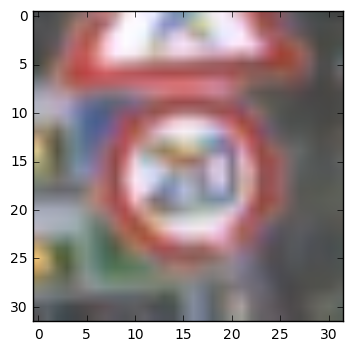

1


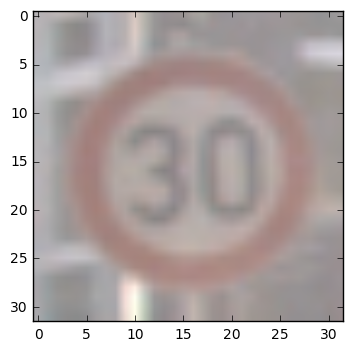

2


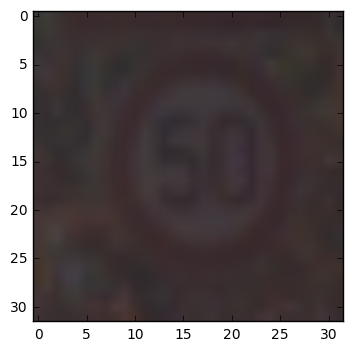

3


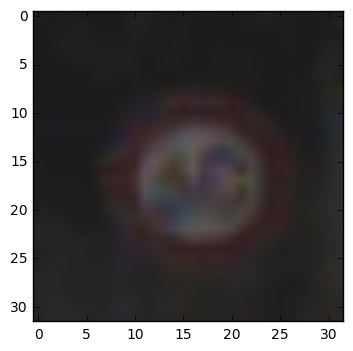

4


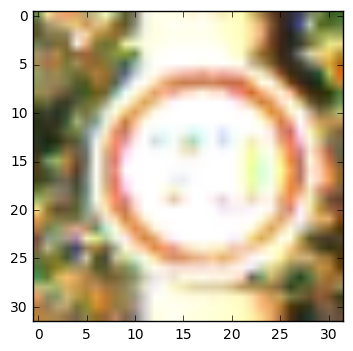

5


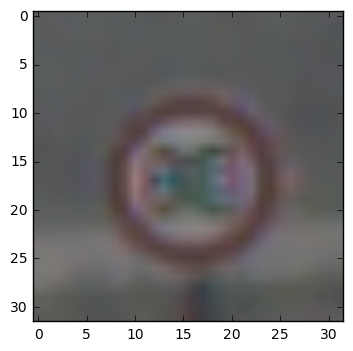

6


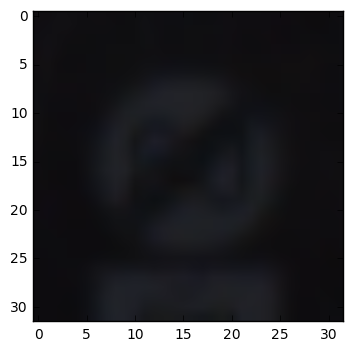

7


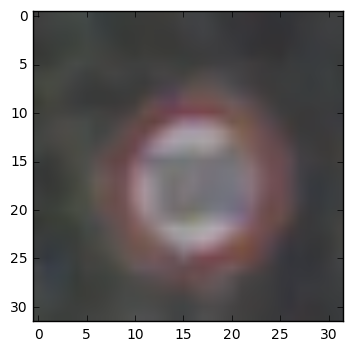

8


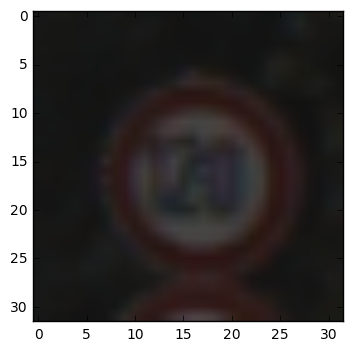

9


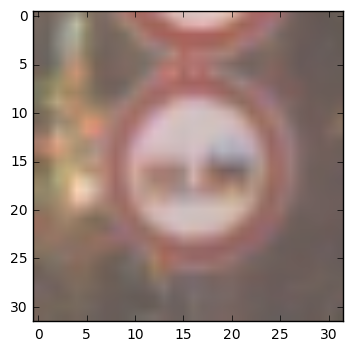

10


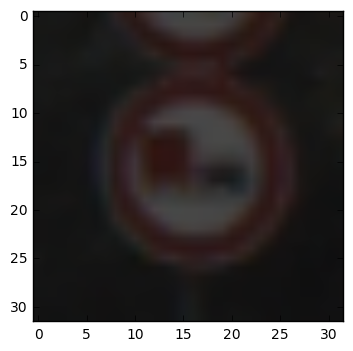

11


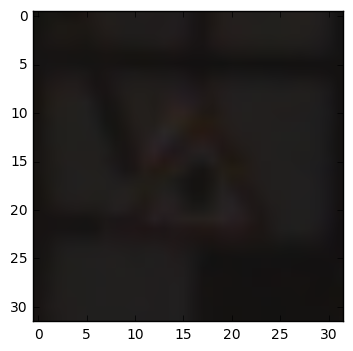

12


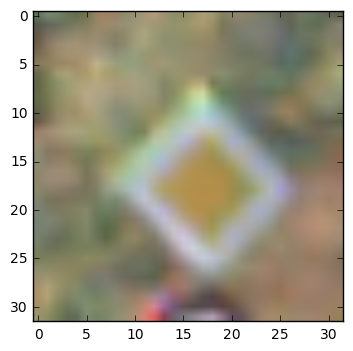

13


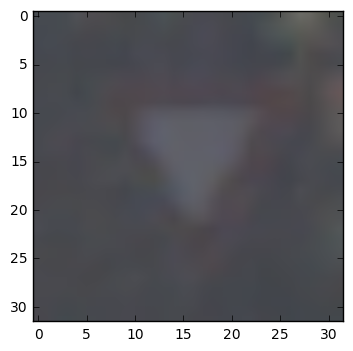

14


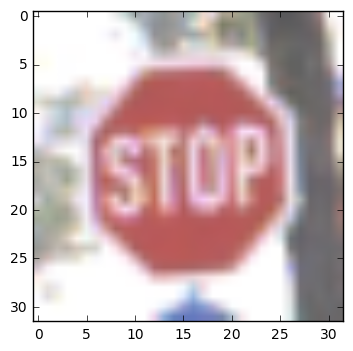

15


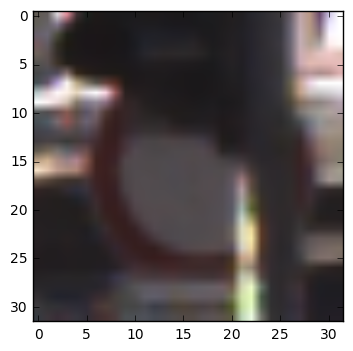

16


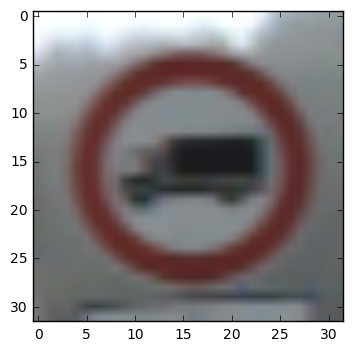

17


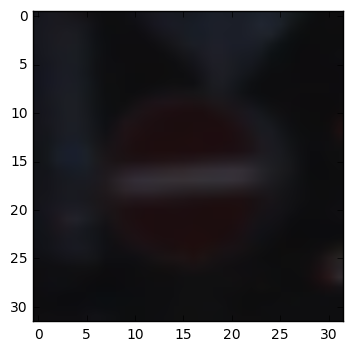

18


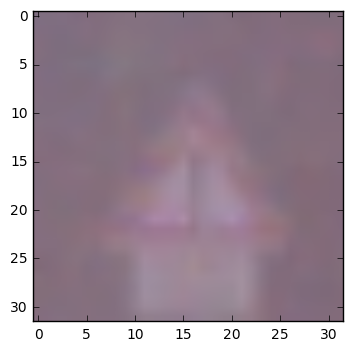

19


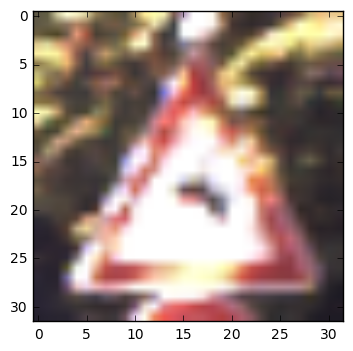

20


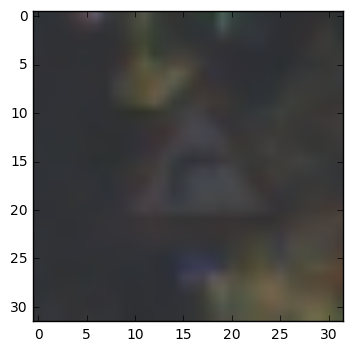

21


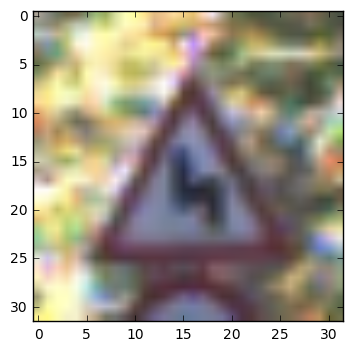

22


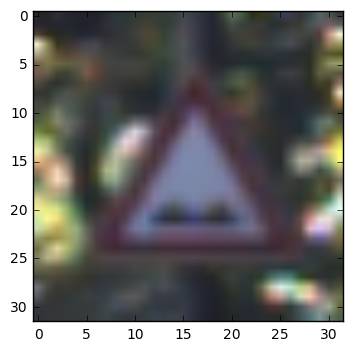

23


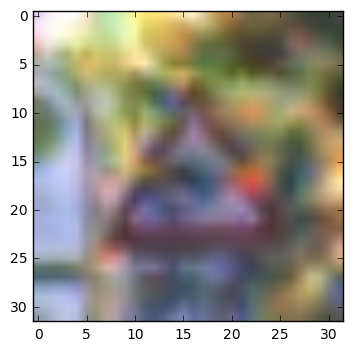

24


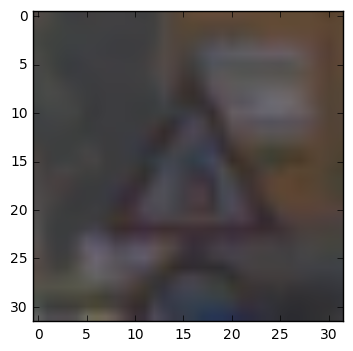

25


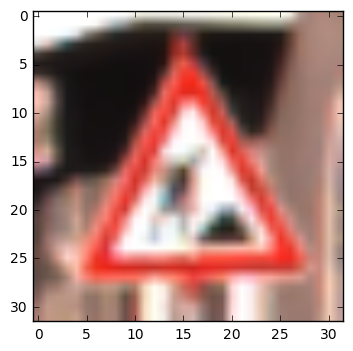

26


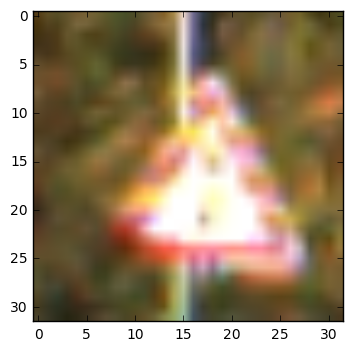

27


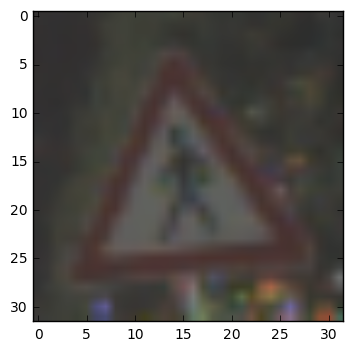

28


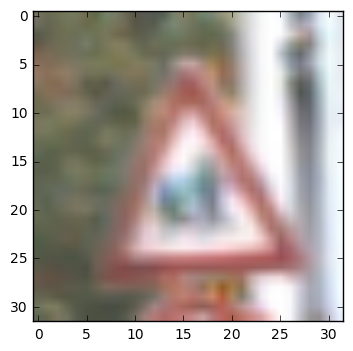

29


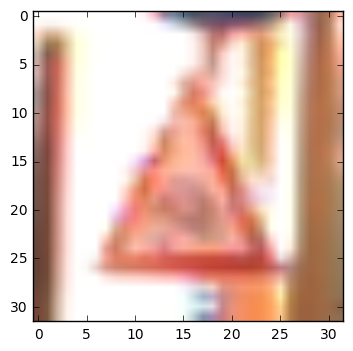

30


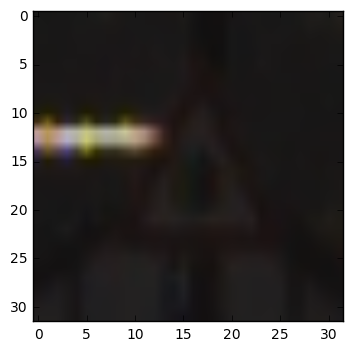

31


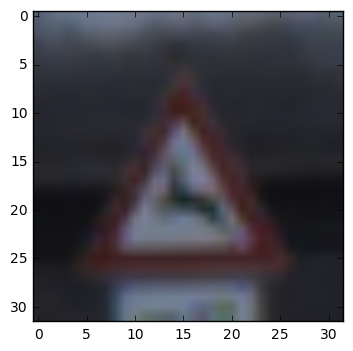

32


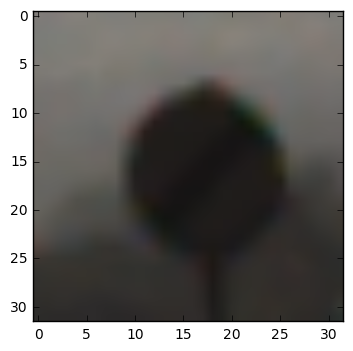

33


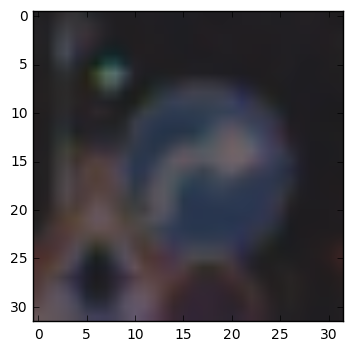

34


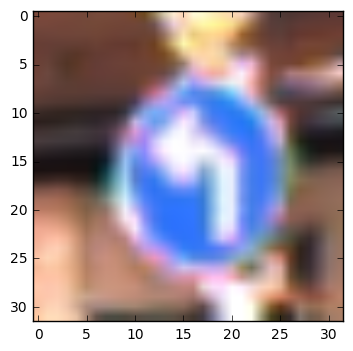

35


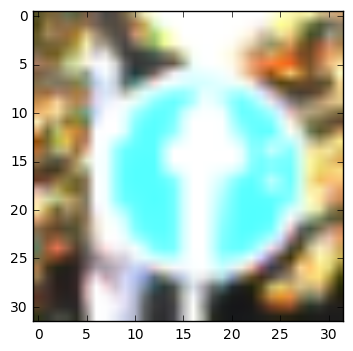

36


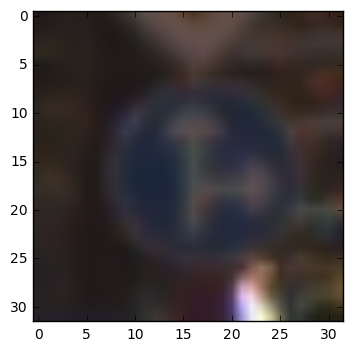

37


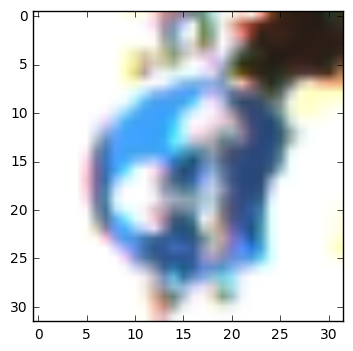

38


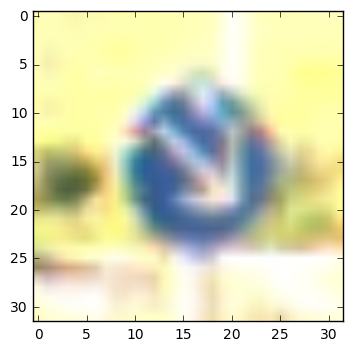

39


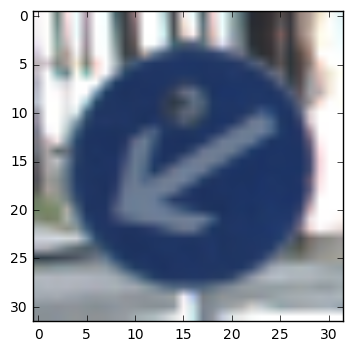

40


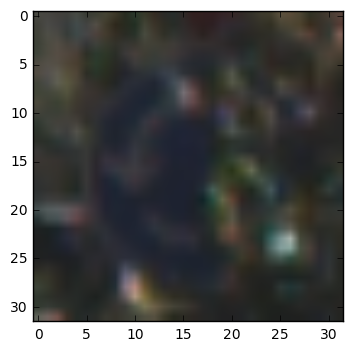

41


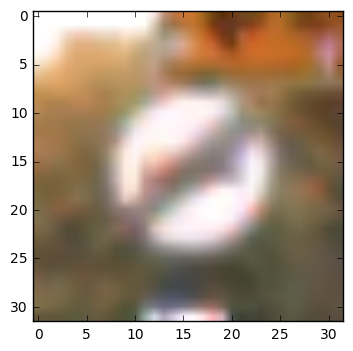

42


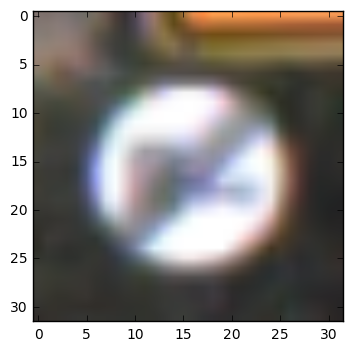

In [50]:
# Show an example image for each class
y_train = list(y_train)

for idx in range(n_classes):
    indices              = [i for i, x in enumerate(y_train) if x == idx]
    print(idx)
    plt.imshow(X_train[indices[0],:,:,:])
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
import random
import cv2

# Create additional training data via random affine transformations of the original dataset
# We want to have 3000 training images per class
NUM_EXAMPLES_PER_CLASS = 3000

y_train = list(y_train)

for idx in range(n_classes):
    indices              = [i for i, x in enumerate(y_train) if x == idx]
    current_num_examples = len(indices)
    
    new_images           = []
    new_labels           = []
    
    for newIdx in range(current_num_examples,NUM_EXAMPLES_PER_CLASS):
        idx_to_modify     = random.randint(0, current_num_examples-1)
        idx_to_modify     = indices[idx_to_modify]
        img_to_modify     = X_train[idx_to_modify,:,:,:]
        #img_to_modify     = img_to_modify.astype(np.float32)
    
        new_angle         = random.uniform(-15.0, 15.0)
        new_shift_x       = random.uniform(-2.0, 2.0)
        new_shift_y       = random.uniform(-2.0, 2.0)
        new_scale_x       = random.uniform(0.9, 1.1)
        new_scale_y       = random.uniform(0.9, 1.1)
        
        M_rot           = cv2.getRotationMatrix2D((16,16),new_angle,1)
        M_shift         = np.float32([[1,0,new_shift_x],[0,1,new_shift_y]])
        M_scale         = np.float32([[new_scale_x,0,16.0*(1.0-new_scale_x)],[0,new_scale_y,16.0*(1.0-new_scale_y)]])
        
        new_image       = cv2.warpAffine(img_to_modify, M_rot,  (32,32))
        new_image       = cv2.warpAffine(new_image,     M_scale,(32,32))
        new_image       = cv2.warpAffine(new_image,     M_shift,(32,32))
        
        new_images.append(new_image)
        new_labels.append(idx)
    
    X_train = np.append(X_train, new_images, axis=0)
    y_train = np.append(y_train, new_labels, axis=0)
    
n_train = X_train.shape[0]

print("n_train {} ...".format(n_train))
print("len(y_train) {} ...".format(len(y_train)))

n_train 129000 ...
len(y_train) 129000 ...


396.288144
0.516096
(129000, 32, 32, 3)


[]

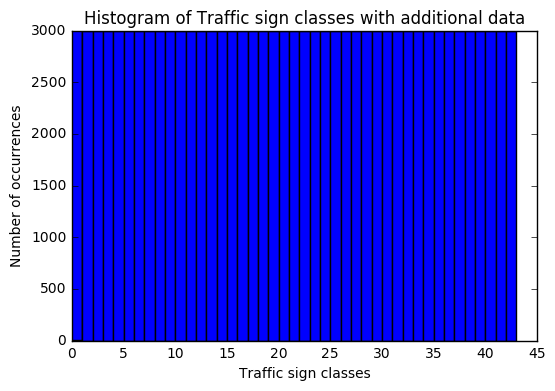

In [6]:
# Show the new histogram including the additional training data
plt.hist(y_train, range(n_classes+1))
plt.title("Histogram of Traffic sign classes with additional data")
plt.xlabel('Traffic sign classes')
plt.ylabel('Number of occurrences')
plt.plot()

In [7]:
### Preprocess the data.
PIXEL_DEPTH = 255
print(np.mean(X_train[1000,:,:,:]))

# Need to use a for loop here - more memory efficient
X_train  =  X_train.astype(np.float32)
for idx in range(n_train):
  X_train_curr       = X_train[idx,:,:,:]
  X_train[idx,:,:,:] = (X_train_curr - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH

X_test  =  X_test.astype(np.float32)
X_test  = (X_test  - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH

129.76171875
0.00886949
1585.152144
0.516096


In [8]:
# Use pickle to save RAM
pickle.dump( X_train, open( "x_train.p", "wb" ) )
del(X_train)
with open('x_train.p', mode='rb') as f:
    train_images = pickle.load(f)
print(getsizeof(train_images)/1000000)
X_train = train_images
print(getsizeof(X_train)/1000000)

0.000144
0.000144


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
A simple image preprocessing scheme is used here. To achieve a certain photogrammetric invariance I have shifted the images towards a mean of zero (-128) with unit variance (/128). A more image specific normalization (subtract mean of each sample, divide by its standard deviation) failed completely in my case. I think too much information is lost in this step. The normalization step introduces a certain lighting invariance paired with numerical advantages.

In [9]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

import random
# Segmenting data into training, test, and validation
# VALIDATION_SIZE = 5000 -> 94.5, 0.956 with additional training data, 0.955 with dropout and more complex model, 97.3 with more epochs
VALIDATION_SIZE = int(n_train*0.2)

training_idx     = list(range(n_train))
random.shuffle(training_idx)

# Use pickle to save RAM
train_images      = X_train[training_idx[VALIDATION_SIZE:], :, :, :]
pickle.dump( train_images, open( "train_images.p", "wb" ) )
del(train_images)
with open('train_images.p', mode='rb') as f:
    train_images = pickle.load(f)

validation_images = X_train[training_idx[:VALIDATION_SIZE], :, :, :]
validation_labels = y_train[training_idx[:VALIDATION_SIZE]]
train_labels      = y_train[training_idx[VALIDATION_SIZE:]]
test_images       = X_test
test_labels       = y_test

del(X_test)
del(X_train)
del(y_train)
del(y_test)
del(training_idx)

print(getsizeof(train_images)/1000000)

# 1-hot encode labels
train_labels      = (np.arange(n_classes) == train_labels[:, None]).astype(np.float32)
validation_labels = (np.arange(n_classes) == validation_labels[:, None]).astype(np.float32)
test_labels       = (np.arange(n_classes) == test_labels[:, None]).astype(np.float32)

0.000144


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I have perturbed the training samples randomly in position ([-2,2] pixels), in scale ([.9,1.1] ratio) and rotation ([-15,+15] degrees). According to the referenced publication by LeCun etal. these deformations will yield more robust learning to potential deformations in the test set.
The initial dataset was not so well balanced, some classes were much more frequent than others. The final training data set contains 3000 samples per class. Using more training data was not possible due to RAM restrictions. I have shuffled the training data set since the traffic signs are ordered by type in the original training data. After that I have chosen 20% random samples for validation. 

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

# 3 color image channels.
NUM_CHANNELS = 3
BATCH_SIZE   = 200
EPOCHS = 100

image_height = image_shape[0]
image_width  = image_shape[1]

layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'fully_connected': 512 #512
}

weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, NUM_CHANNELS, layer_width['layer_1']], stddev=0.1)),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']], stddev=0.1)),
    'fully_connected': tf.Variable(tf.truncated_normal(
        [5 * 5 * 64, layer_width['fully_connected']], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes], stddev=0.1))
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def conv2d(x, W, b, padding, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, [1, strides, strides, 1], padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)
    
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

In [11]:
from tensorflow.contrib.layers import flatten

def model(x):    
    # Convolution layer 1. The output shape should be 28x28x32.
    x = conv2d(x, weights['layer_1'], biases['layer_1'], 'VALID')

    # Pooling layer 1. The output shape should be 14x14x32.
    x = maxpool2d(x)

    # Convolution layer 2. The output shape should be 10x10x64.
    x = conv2d(x, weights['layer_2'], biases['layer_2'], 'VALID')

    # Pooling layer 2. The output shape should be 5x5x64.
    x = maxpool2d(x)

    # Reshape the feature map cuboid into a 2D matrix to feed it to the
    # fully connected layers.
    # x_shape = x.get_shape().as_list()
    x       = flatten(x) # tf.reshape(x,[x_shape[0], x_shape[1] * x_shape[2] * x_shape[3]])
    
    # Fully connected layer 1. This should have 512 outputs.
    x = tf.add(tf.matmul(x, weights['fully_connected']), biases['fully_connected'])

    # Activation 3. 
    x = tf.nn.relu(x)
    
    # Add a 50% dropout during training only. Dropout also scales
    # activations such that no rescaling is needed at evaluation time.
    #if train:
    x = tf.nn.dropout(x, keep_prob)
    
    # Fully connected layer 2. This should have 43 outputs.
    x = tf.add(tf.matmul(x, weights['out']), biases['out'])
    
    # Return the result of the last fully connected layer.
    return x

In [12]:
x = tf.placeholder(tf.float32, shape=(BATCH_SIZE, image_shape[0], image_shape[1], NUM_CHANNELS))
y = tf.placeholder(tf.float32, shape=(BATCH_SIZE,n_classes))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
#y = tf.placeholder(tf.float32)

logits = model(x)
loss   = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

# L2 regularization for the fully connected parameters.
regularizers = (tf.nn.l2_loss(weights['fully_connected']) + tf.nn.l2_loss(biases['fully_connected']) +
                tf.nn.l2_loss(weights['out'])             + tf.nn.l2_loss(biases['out']))
# Add the regularization term to the loss.
loss += 5e-4 * regularizers

opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
def eval_data(images, labels):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    # If dataset.num_examples is not divisible by BATCH_SIZE
    # the remainder will be discarded.
    # Ex: If BATCH_SIZE is 64 and training set has 55000 examples
    # steps_per_epoch = 55000 // 64 = 859
    # num_examples = 859 * 64 = 54976
    #
    # So in that case we go over 54976 examples instead of 55000.
    steps_per_epoch = images.shape[0] // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc = 0
    sess = tf.get_default_session()
    for step in range(steps_per_epoch):
        batch_start = step*BATCH_SIZE
        batch_x = images[batch_start:batch_start + BATCH_SIZE,:,:,:]
        batch_y = labels[batch_start:batch_start + BATCH_SIZE,:]
        
        acc = sess.run(accuracy_op, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_acc += (acc * batch_x.shape[0])
    return total_acc/num_examples

In [14]:
with tf.Session() as sess:
        saver = tf.train.Saver()
        sess.run(tf.global_variables_initializer())
        steps_per_epoch = train_images.shape[0] // BATCH_SIZE
        num_examples = steps_per_epoch * BATCH_SIZE

        # Train model
        for i in range(EPOCHS):
            
            # Random shuffle training data
            training_idx     = list(range(train_images.shape[0]))
            random.shuffle(training_idx)
            #train_images, train_labels = shuffle(train_images, train_labels, random_state=42)
            
            batch_x = np.zeros(shape=(BATCH_SIZE,image_shape[0],image_shape[1],NUM_CHANNELS))
            batch_y = np.zeros(shape=(BATCH_SIZE,n_classes))
            for step in range(steps_per_epoch):
                batch_start = step*BATCH_SIZE
                
                batch_x        = train_images[training_idx[batch_start:batch_start + BATCH_SIZE],:,:,:]
                batch_y        = train_labels[training_idx[batch_start:batch_start + BATCH_SIZE],:]
                
                loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
                
            if (i+1) % 20 == 0:
                # Append the step number to the checkpoint name:
                saver.save(sess, 'model\model.ckpt', global_step=i)
        
            val_acc = eval_data(validation_images, validation_labels)
            print("EPOCH {} ...".format(i+1))
            print("Validation accuracy = {:.3f}".format(val_acc))
        
        # Evaluate on the test data
        test_acc = eval_data(test_images, test_labels)
        print("Test accuracy = {:.3f}".format(test_acc))

EPOCH 1 ...
Validation accuracy = 0.953
EPOCH 2 ...
Validation accuracy = 0.983
EPOCH 3 ...
Validation accuracy = 0.989
EPOCH 4 ...
Validation accuracy = 0.992
EPOCH 5 ...
Validation accuracy = 0.991
EPOCH 6 ...
Validation accuracy = 0.992
EPOCH 7 ...
Validation accuracy = 0.990
EPOCH 8 ...
Validation accuracy = 0.994
EPOCH 9 ...
Validation accuracy = 0.994
EPOCH 10 ...
Validation accuracy = 0.994
EPOCH 11 ...
Validation accuracy = 0.995
EPOCH 12 ...
Validation accuracy = 0.995
EPOCH 13 ...
Validation accuracy = 0.993
EPOCH 14 ...
Validation accuracy = 0.994
EPOCH 15 ...
Validation accuracy = 0.995
EPOCH 16 ...
Validation accuracy = 0.994
EPOCH 17 ...
Validation accuracy = 0.996
EPOCH 18 ...
Validation accuracy = 0.996
EPOCH 19 ...
Validation accuracy = 0.996
EPOCH 20 ...
Validation accuracy = 0.997
EPOCH 21 ...
Validation accuracy = 0.996
EPOCH 22 ...
Validation accuracy = 0.996
EPOCH 23 ...
Validation accuracy = 0.996
EPOCH 24 ...
Validation accuracy = 0.997
EPOCH 25 ...
Validation a

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The first layer consists of 32 5x5 convolutional filters with valid padding followed by a non-linear ReLu activation and 2x2 maxpooling. The output of the convolution layer is 28x28x32 and 14x14x32 after maxpooling. The output of this convolutional module is fed into a second convolutional layer with 64 5x5 filters with valid padding again followed by a non-linear ReLu activation and 2x2 maxpooling. The output of this second layer is 5x5x64. After that, the output is flattened and fed into a fully connected feedforward layer with 512 output neurons. After non-linear ReLu activation dropout is applied to reduce the effect of overfitting. After that, a second fully connected output layer exists with 43 output neurons which reflects the number of classes. The cost function optimizes cross entropy with L2 regularization also to prevent overfitting and large weights.

In [17]:
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "model\model.ckpt-79")
  print("Model restored.")
  # Do some work with the model
  test_acc = eval_data(test_images, test_labels)
  print("Test accuracy = {:.3f}".format(test_acc))


Model restored.
Test accuracy = 0.974


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
For optimization Adam's optimizer was used since it might currently be the best choice (see http://sebastianruder.com/optimizing-gradient-descent/ for a comparison). The batch size was 100 and 80 training epochs. Adding more layers did not yield better results. Hyperparameters were not tuned systematically, see below. Using more epochs did not yield an improvement, too.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
Basically I have used the LeNet architecture as a starting point. I did not tune the hyperparameters systematically. Instead I just checked that different features yield some improvement. I have slightly increased model complexity in comparison with LeNet since the classiciation problem here is far more complex in comparison with MNIST (more classes, classes are more similar). As discussed above I've tried adding more layers and adding more dropout layers, however this did not give better results. The effect of the additional training examples was small but significant (about 1%). L2 regularization also gave a slight increase in the testing accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

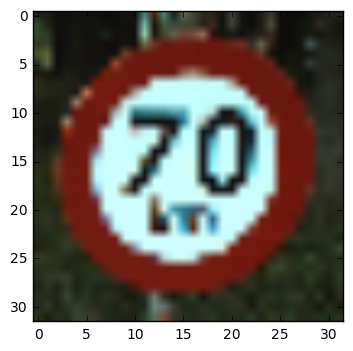

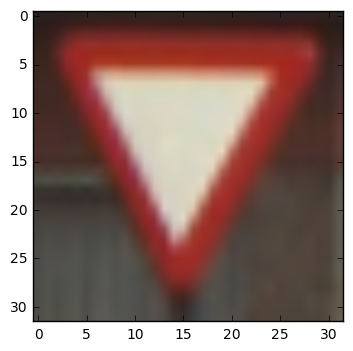

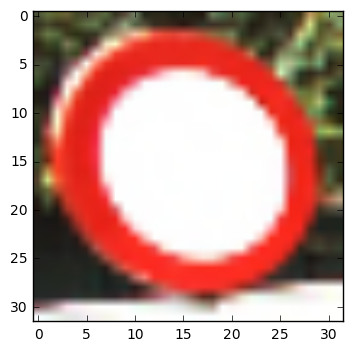

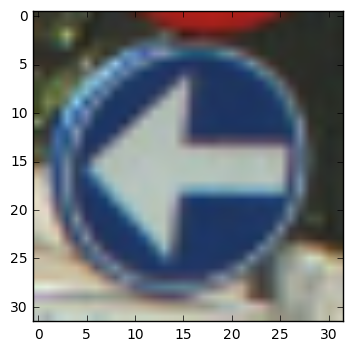

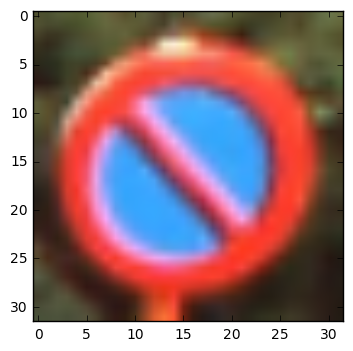

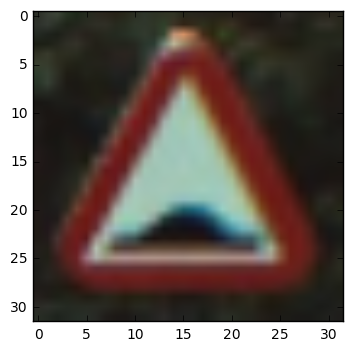

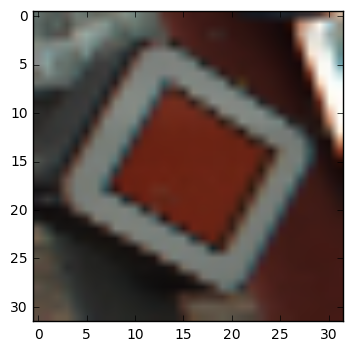

In [46]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy.misc import imread
import os
files = os.listdir( "test_images/" )

new_input = []

for file in files:
    image = imread("test_images/" + file)
    image = cv2.resize(image, (32,32))
    new_input.append(image)
    plt.imshow(image)
    plt.show()

In [51]:
# Normalize the images
for idx in range(len(new_input)):
    img            = new_input[idx]
    img            = img.astype(np.float32)
    img            = (img - PIXEL_DEPTH / 2.0) / PIXEL_DEPTH
    new_input[idx] = img

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I took some example pictures from the Belgium traffic sign dataset (http://btsd.ethz.ch/shareddata/). It is another challenging dataset with different lighting conditions and viewing directions. Traffic sign 1 has a slightly different appearance than in the other dataset ("km" is added). Image number 4 ("turn left") is not contained in the original dataset, the same applies for sign number 5 ("no parking"). It might be interesting to see if the classifier 
a) classifies the known traffic signs correctly
b) finds "close" solutions for the unknown classes.

In [48]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
x_test = tf.placeholder(tf.float32, shape=(None, image_shape[0], image_shape[1], NUM_CHANNELS))

prediction = tf.nn.softmax(model(x_test))
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "model\model.ckpt-79")
  print("Model restored.")
  # Do some work with the model
    
  pred = sess.run(prediction, feed_dict={x_test: new_input, keep_prob: 1.0})
  print('Predictions from classifier:')
  print(np.argmax(pred, axis=1))

Model restored.
Predictions from classifier:
[ 0 13 15 36  2 22 12]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The classifier got 4 from 7 correct which is about 57%. So clearly the performance is worse compared to the testing on the German dataset. This fact is not surprising since some road signs are completely new for the classifier and he has no class for them. So do not take the results too serious. 
Traffic sign 1 ("70 km/h") is confused with the "20 km/h" sign. At least both of them look similar. 
The known traffic signs are classified correctly.
The "turn left" sign is confused with another direction sign "Go straight or right" It might be that this is really the most similar sign in the German dataset, however the important sign direction is wrong.
Finally the "no parking" sign is interpreted as a speed sign ("50 km/h"). This sign was rather difficult since there is really no similar sign in the German dataset (red/blue mix).

In [49]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "model\model.ckpt-79")
  print("Model restored.")
  # Do some work with the model
  print(sess.run(tf.nn.top_k(prediction, k=3), feed_dict={x_test: new_input, keep_prob: 1.0}))

Model restored.
TopKV2(values=array([[  9.99864221e-01,   1.14451905e-04,   2.07688900e-05],
       [  1.00000000e+00,   5.35557598e-16,   8.67932118e-20],
       [  1.00000000e+00,   1.20833307e-33,   0.00000000e+00],
       [  9.96982276e-01,   2.08280073e-03,   6.42431492e-04],
       [  9.99999881e-01,   1.28407947e-07,   1.68624226e-08],
       [  1.00000000e+00,   1.32192540e-18,   4.67600030e-21],
       [  1.00000000e+00,   6.04558829e-13,   6.77234893e-14]], dtype=float32), indices=array([[ 0,  8,  4],
       [13, 14,  2],
       [15,  8,  0],
       [36, 39, 33],
       [ 2, 39, 38],
       [22, 26, 15],
       [12, 14, 17]]))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

"""
The model is very sure of its results. Even when the classification result is wrong, there is no doubt on the final result. However, the uncertainty is higher for the wrong results. Maybe some kind of rescaling or another mapping (linear or polynomial) is needed in order to interpret the network results as probabilities. 
The assumed certainty of the model is not a desirable behavior since the softmax probability should reflect the true uncertainty of the model. Maybe the very "sharp" results are a indicator for overfitting on the dataset or are an inherent property of the softmax transform. If the dataset is not sufficient as in this case, it's certainty on new signs might be drawback of the current system.
""" 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.